In [10]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars = pd.DataFrame(star_wars)
print(star_wars.head(10))
star_wars.columns


   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             
3    3292763116                                                Yes             
4    3292731220                                                Yes             
5    3292719380                                                Yes             
6    3292684787                                                Yes             
7    3292663732                                                Yes             
8    3292654043                                                Yes             
9    3292640424                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [11]:
yes_no = {'Yes': True,
         'No': False
         }
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)


star_wars['Have you seen any of the 6 films in the Star Wars franchise?']







0        True
1       False
2        True
3        True
4        True
        ...  
1181     True
1182     True
1183    False
1184     True
1185     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, Length: 1186, dtype: bool

In [12]:
import numpy as np
import re
cols = star_wars.columns[3:9]
print(star_wars[cols])
map1 = {'Star Wars: Episode I  The Phantom Menace': True, 
        'Star Wars: Episode II  Attack of the Clones': True,
        'Star Wars: Episode III  Revenge of the Sith': True, 
        'Star Wars: Episode IV  A New Hope': True,
        'Star Wars: Episode V The Empire Strikes Back': True,
        'Star Wars: Episode VI Return of the Jedi': True, 
        np.nan: False
           }
                     
for col in cols:
    star_wars[col] = star_wars[col].map(map1)
        
        
        

print(star_wars[cols])

     Which of the following Star Wars films have you seen? Please select all that apply.  \
0              Star Wars: Episode I  The Phantom Menace                                    
1                                                   NaN                                    
2              Star Wars: Episode I  The Phantom Menace                                    
3              Star Wars: Episode I  The Phantom Menace                                    
4              Star Wars: Episode I  The Phantom Menace                                    
...                                                 ...                                    
1181           Star Wars: Episode I  The Phantom Menace                                    
1182           Star Wars: Episode I  The Phantom Menace                                    
1183                                                NaN                                    
1184           Star Wars: Episode I  The Phantom Menace                         

In [13]:
count = 1
for col in cols:
    star_wars.rename(columns = {col: 'seen_' + str(count)}, inplace=True)
    count += 1

In [14]:
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,3288388730,True,True,True,True,True,True,True,True,5.0,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,True,True,True,True,True,True,True,True,4.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1183,3288375286,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1184,3288373068,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


In [20]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

cols = star_wars.columns[9:15]
counter = 1
for col in cols:
    star_wars.rename(columns = {col: "ranking_" + str(counter)}, inplace=True)
    counter += 1


star_wars.iloc[:, 9:15]



,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


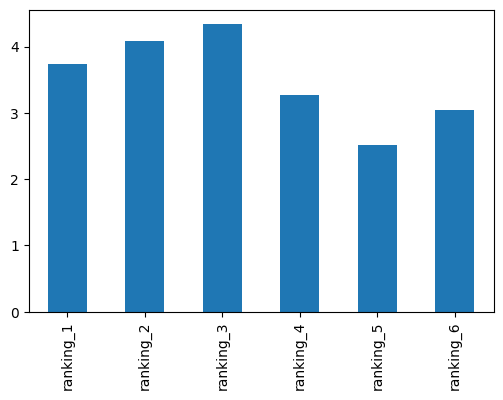

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


cols = star_wars.columns[9:15]
mean = star_wars[cols].mean()

mean.plot.bar(figsize=(6,4))
plt.show()

    

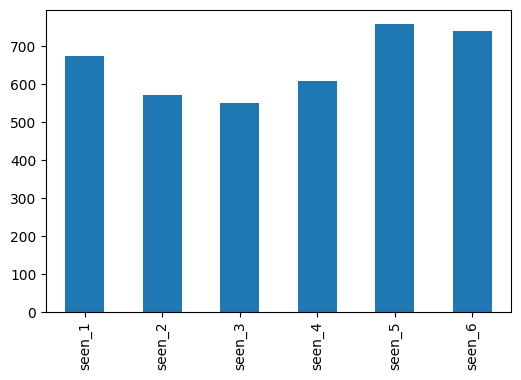

In [29]:
cols = star_wars.columns[3:9]
summ = star_wars[cols].sum()
summ.plot.bar(figsize=(6, 4))
plt.show()

In [32]:
males = star_wars[star_wars["Gender"] == "Male"]

females = star_wars[star_wars["Gender"] == "Female"]



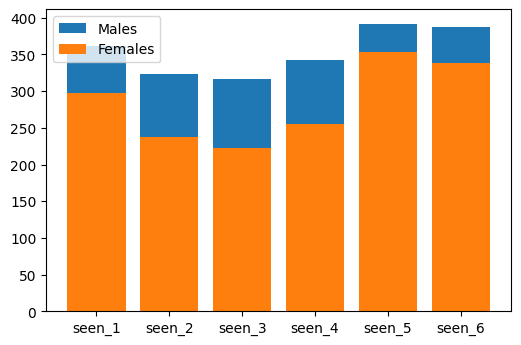

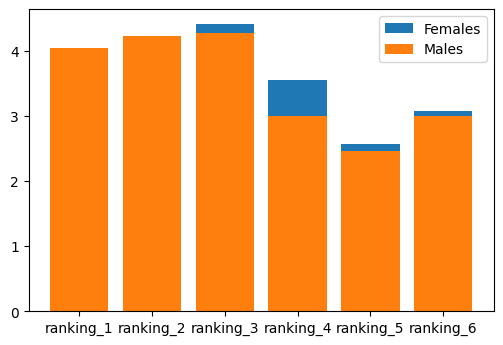

In [39]:
colsm = males.columns[3:9]
summ = males[colsm].sum()
plt.bar(colsm, summ, label='Males')

colsf = females.columns[3:9]
sumf = females[colsf].sum()
plt.bar(colsf, sumf, label='Females')
plt.legend()
plt.show()



colsf = females.columns[9:15]
meanf = females[colsf].mean()
plt.bar(colsf, meanf, label='Females')

colsm = males.columns[9:15]
meanm = males[colsm].mean()
plt.bar(colsm, meanm, label='Males')


plt.legend()
plt.show()

